In [28]:
from PIL import Image
import matplotlib.pyplot as plt

# Keras 창시자에게 배우는 딥러닝

> 딥러닝을 학습하는 기본서 중 하나로 추천되는 교재입니다. 해당 교재를 통해 앞으로 약 2달 동안 학습하며 관련 내용을 정리해보겠습니다.  
교재와 https://github.com/tmdrb0707/deep-learning-with-python-notebooks 의 자료를 활용하여 스스로 학습한 내용입니다.  
따라서 교재와는 구성이 다를 수 있으며, 내용에 따라 개념이 미흡한 부분이 있을 수 있습니다.

<hr/>

### 2.1 신경망과의 첫 만남

머신러닝 커뮤니티에서 가장 고전으로 취급받는 Data Set인 ***MNIST***를 활용하여 간단하게 구현을 시작합니다.
![Mnist](pic\Mnist.png)
***<p style="text-align: center;"> Mnist Data</p>***

In [38]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [39]:
train_images.shape

(60000, 28, 28)

In [40]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

훈련데이터는 60000개의 sample을 가지고 있으며 크기는 28 X 28 사이즈입니다.  
또한 labes이 의미하는것은 정답이라고 보면 되겠습니다. 좀 더 구체적으로 살펴보겠습니다.

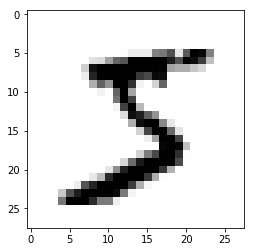

In [41]:
data = train_images[0]
plt.imshow(data, cmap=plt.cm.binary)
plt.show()

훈련데이터의 0번째 인덱싱에는 위와 같은 이미지가 저장되어있습니다. matplotlib으로 그려보면 5라는 숫자임을 알 수 있습니다.  
훈련데이터 레이블의 0번째 인덱싱을 확인해보면 똑같이 5가 저장되어있음을 알 수 있습니다.  
이제 간단히 신경망을 구성해봅니다.

In [42]:
from keras import models
from keras import layers

network = models.Sequential() 
network.add(layers.Dense(512, activation = "relu", input_shape = (28 * 28,)))
network.add(layers.Dense(10, activation = "softmax"))
network.compile(optimizer = "rmsprop",
                loss = "categorical_crossentropy",
                metrics = ["accuracy"])

In [43]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [44]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [45]:
network.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
60000/60000 [==============================] - 8s 137us/step - loss: 0.2593 - acc: 0.9267
Epoch 2/5
60000/60000 [==============================] - 8s 131us/step - loss: 0.1057 - acc: 0.9691
Epoch 3/5
60000/60000 [==============================] - 8s 130us/step - loss: 0.0695 - acc: 0.9790
Epoch 4/5
60000/60000 [==============================] - 8s 130us/step - loss: 0.0508 - acc: 0.9845
Epoch 5/5
60000/60000 [==============================] - 8s 132us/step - loss: 0.0382 - acc: 0.9888


In [47]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("test accuracy : ", test_acc)

10000/10000 [==============================] - 1s 88us/step
test accuracy :  0.9806


[해당 라인에 대한 코드의 상세설명은 전체 학습 이후에 다시 추가]

<hr/>
### 2.2 신경망을 위한 데이터 표현

이번 절에서는 데이터의 표현에 대해서 다뤄봅니다. 앞으로는 ***텐서*** 라는 단어가 나오는데 이것은 데이터를 표현하는 단위(또는 차원)라고 생각하면 되겠습니다. 우리가 사용하는 텐서는 아래 4가지 정도를 가장 많이 이용합니다.
1. 벡터 데이터 : (Samples, features) 2D 텐서
2. 순서 또는 시계열 데이터 : (Samples, timesteps, features) 3D 텐서
3. 이미지 데이터 : (Samples, height, width, channels) 4D 텐서
4. 동영상 데이터 : (Samples, frames, height, width, channels) 5D 텐서

고등학교 수학시간 때 배웠던 개념을 생각해보면 조금 쉽게 접근할 수 있을것같습니다. 가장 저차원 텐서인 0차원부터 알아보도록 합니다.

#### 2.2.1 스칼라(0D 텐서)

하나의 숫자만 담고 있는 텐서를 *스칼라* 텐서라고 부릅니다. ndim 함수를 사용하면 텐서의 차원을 확인할 수 있습니다.

In [54]:
import numpy as np
x = np.array(5)
x

array(5)

In [53]:
x.ndim

0

#### 2.2.2 벡터(1D 텐서)

스칼라값의 배열을 *벡터* 라고 부릅니다. 1D 텐서는 하나의 축을 가집니다.

In [55]:
x = np.array([1,2,3,4,5])
x

array([1, 2, 3, 4, 5])

In [56]:
x.ndim

1

#### 2.2.3 행렬(2D 텐서)

벡터의 배열을 *행렬*이라고 부릅니다. 2D 텐서는 두개의 축을 가지고 있습니다. 가로축(행)과 세로축(열)은 고등학교 수학시간에 많이 본 형태입니다.

In [58]:
x = np.array([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15]])
x

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

In [60]:
x.ndim

2

#### 2.2.4 3D 텐서

행렬의 배열을 3D 텐서라고 부릅니다. 3D 텐서는 정육면체와 같은 공간의 개념이 들어간 형태로 생각하면 이해하기 쉬울것입니다.

In [62]:
x = np.array([[[1,2,3],[4,5,6],[7,8,9]],
              [[10,11,12],[13,14,15],[16,17,18]],
              [[19,20,21],[22,23,24],[25,26,27]]])
x

array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9]],

       [[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]],

       [[19, 20, 21],
        [22, 23, 24],
        [25, 26, 27]]])

In [63]:
x.ndim

3

마찬가지로 4D텐서는 3D텐서의 배열을 뜻하는것이고, 5D텐서는 4D텐서의 배열을 뜻하는 것입니다.

![tensor_cube](pic\tensor_cube.jpeg)
<p style="text-align: center;"> Tensor_Cube </p>